In [117]:
import pandas as pd
import seaborn as sns
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

I want to do some exploratory analysis of the results that were generated using this repository. 

In [4]:
test_results = "/Users/caz3so/workspaces/tacazares/pchic/data/outputs/correlation_analysis/CD4_1M_50K_5kb_within_newbmap_CHiCAGO_ABC_peakm_correlation_stats.tsv"

In [70]:
corr_dir = "/Users/caz3so/workspaces/tacazares/pchic/data/outputs/correlation_analysis"

In [50]:
class corr_analysis(object):
    def __init__(self,
                 filename
                 ):
        self.filename = filename
        
        # Import file into a dataframe
        self.df = pd.read_table(self.filename, sep="\t", header=0, index_col="Feature")
     
        self.df_pval = self.df[["Spearman_pval"]]

        self.colname = os.path.basename(self.filename).replace(".tsv", "")
                
        self.df_pval.columns = [self.colname]
        

In [192]:
cor_list = []

for file in glob.glob(os.path.join(corr_dir, "*.tsv")):
    cor_test = corr_analysis(file)
    
    cor_list.append(cor_test.df_pval)

In [193]:
cat_df = pd.concat(cor_list, axis=1)

In [194]:
cat_df

,CD4_1M_50K_5kb_within_newbmap_CHiCAGO_ABC_peakm_correlation_stats,ILC3_merged_bin5K_score5_correlation_stats,CD4_1M_50K_merged_reweighting_peakmatrix_score5_correlation_stats,CD4_1M_50K_5kb_within_newbmap_CHiCAGO_peakm_correlation_stats,ILC_5kb_within_newbmap_CHiCAGO_ABC_peakm_correlation_stats
Feature,,,,,
ATAC,8.870592e-171,2.604830e-143,2.493171e-67,1.379838e-142,2.075671e-178
H3K27ac,1.565010e-44,1.228442e-158,4.326785e-18,4.450099e-73,1.790234e-235
H3K4me3,8.902152e-209,1.641949e-114,8.403177e-37,1.057383e-107,6.399420e-240
RE,9.259871e-175,6.178784e-162,1.318676e-68,1.327043e-142,8.299810e-208


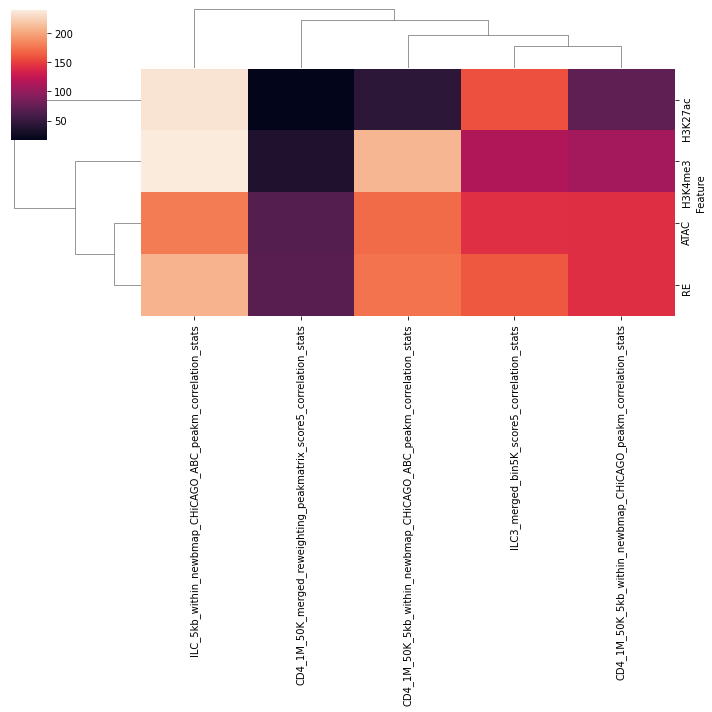

In [195]:
sns.clustermap(-np.log10(cat_df))

In [172]:
df_interaction_count = pd.read_table("/Users/caz3so/scratch/20220606_spivakov_pchic_reanalysis/20220718_pchic_interaction_counts_before_after_filtering.tsv")

In [173]:
df_interaction_count

,Counts,Filename,Filtering,Date
0,135012,CD4_1M_50K_5kb_within_newbmap_CHiCAGO_ABC_peak...,Unfiltered,New + ABC
1,110269,CD4_1M_50K_5kb_within_newbmap_CHiCAGO_peakm.txt,Unfiltered,New
2,58633,ILC3_merged_bin5K_score5.txt,Unfiltered,Old
3,84683,ILC_5kb_within_newbmap_CHiCAGO_ABC_peakm.txt,Unfiltered,New + ABC
4,128751,CD4_1M_50K_5kb_within_newbmap_CHiCAGO_ABC_peak...,Filtered,New + ABC
5,109469,CD4_1M_50K_5kb_within_newbmap_CHiCAGO_peakm.txt,Filtered,New
6,57133,ILC3_merged_bin5K_score5.txt,Filtered,Old
7,80587,ILC_5kb_within_newbmap_CHiCAGO_ABC_peakm.txt,Filtered,New + ABC


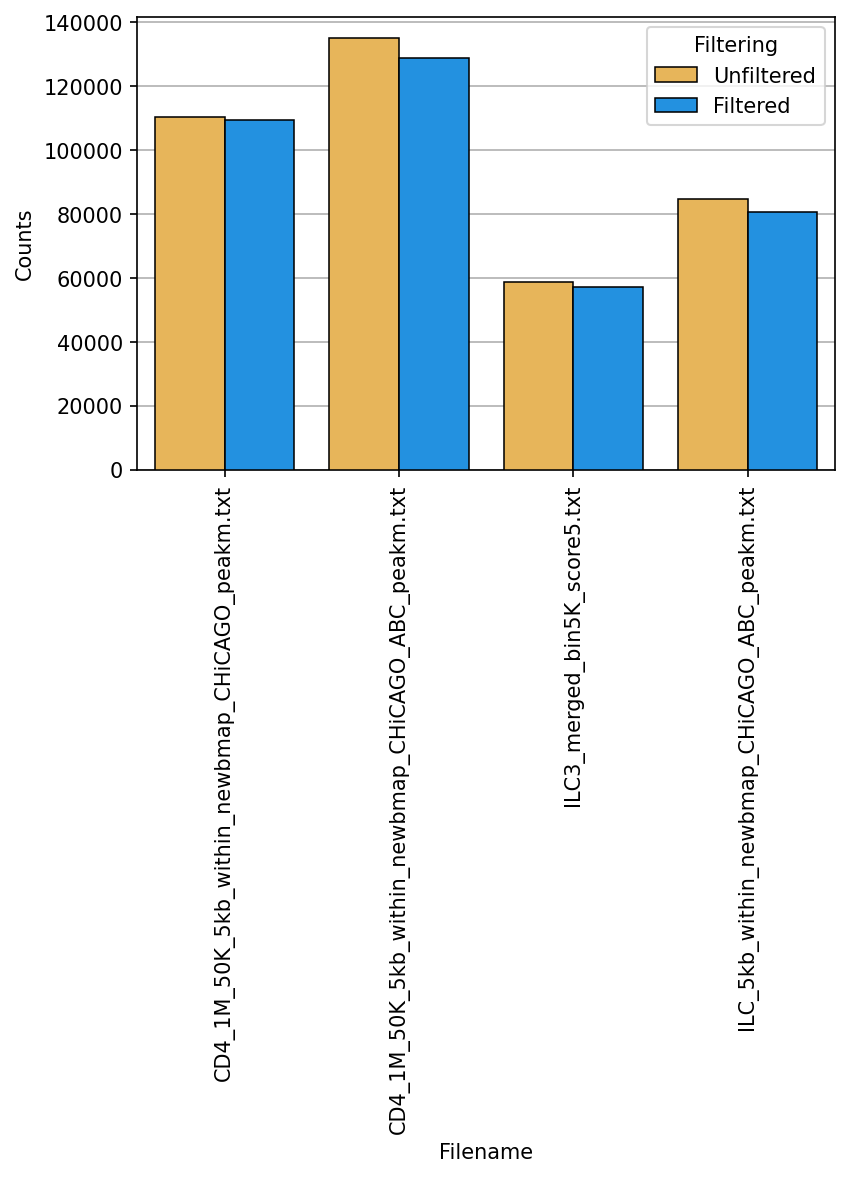

In [189]:
plt.figure(figsize=(6,4), dpi=150)
sns.barplot(data=df_interaction_count, 
            x="Filename", 
            y="Counts", 
            hue="Filtering", 
            palette=["#FFBC42", "#0496FF"], 
            #alpha=.75, 
            linewidth=.75, 
            edgecolor="black",
            order=["CD4_1M_50K_5kb_within_newbmap_CHiCAGO_peakm.txt", "CD4_1M_50K_5kb_within_newbmap_CHiCAGO_ABC_peakm.txt", 'ILC3_merged_bin5K_score5.txt', 'ILC_5kb_within_newbmap_CHiCAGO_ABC_peakm.txt'],
            zorder=15)
plt.xticks(rotation=90)
plt.grid(zorder=0, axis="y")

In [190]:
df_interaction_count

,Counts,Filename,Filtering,Date
0,135012,CD4_1M_50K_5kb_within_newbmap_CHiCAGO_ABC_peak...,Unfiltered,New + ABC
1,110269,CD4_1M_50K_5kb_within_newbmap_CHiCAGO_peakm.txt,Unfiltered,New
2,58633,ILC3_merged_bin5K_score5.txt,Unfiltered,Old
3,84683,ILC_5kb_within_newbmap_CHiCAGO_ABC_peakm.txt,Unfiltered,New + ABC
4,128751,CD4_1M_50K_5kb_within_newbmap_CHiCAGO_ABC_peak...,Filtered,New + ABC
5,109469,CD4_1M_50K_5kb_within_newbmap_CHiCAGO_peakm.txt,Filtered,New
6,57133,ILC3_merged_bin5K_score5.txt,Filtered,Old
7,80587,ILC_5kb_within_newbmap_CHiCAGO_ABC_peakm.txt,Filtered,New + ABC
